# [seaborn: statistical data visualization](http://seaborn.pydata.org/index.html)
## [Distribution Plots](http://seaborn.pydata.org/tutorial/distributions.html#distribution-tutorial): <font style="font-size:16px;color:green;">

**distribution plots includes**: <code>distplot(), jointplot(), pairplot(), kdeplot()</code> etc.  

In [5]:
import seaborn as sns
import matplotlib.pylab as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading data set 
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [3]:
# Lets get a concise summary of the data set.
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


## <code>[distplot()](http://seaborn.pydata.org/generated/seaborn.distplot.html#seaborn.distplot)</code>

The most convenient way to take a quick look at a univariate (single variable) distribution in seaborn is the <code>distplot()</code> function.<br> By default, this will draw a **histogram** and fit a **[kernel density estimate (KDE)](https://en.wikipedia.org/wiki/Kernel_density_estimation)**.<br>

<AxesSubplot:xlabel='tip', ylabel='Density'>

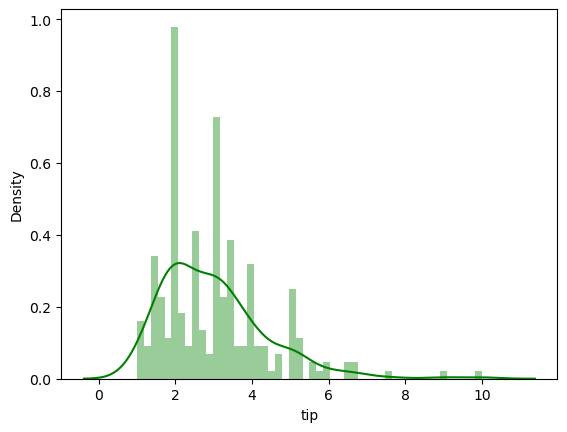

In [10]:
# lets check how the total bill are distributed in the data set
sns.distplot(tips['tip'], bins=50,kde=True,color="g") #g or green both are same

<AxesSubplot:xlabel='total_bill'>

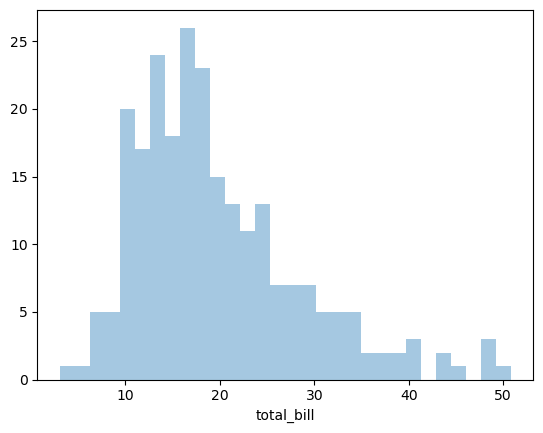

In [13]:
sns.distplot(tips['total_bill'],kde=False,bins=30)
# If you want to display tip col as well
# sns.distplot(tips['tip'],kde=False,bins=30)

## <code>[jointplot()](http://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn.jointplot)</code>
We want to do some comparison, how much the customer gave in tip based of their total bill. Seaborn provides a convenient way of plotting bivariate (two variables) data using <code>jointplot()</code>. The function basically match up two distribution plots with our choice of what **kind** (scatter by default) parameter to compare with: 
* kind : { "scatter" | "reg" | "resid" | "kde" | "hex" }

We need to pass in the data set (tips) and tell the function what variables (columns) we want to plot to compare and what is the kind parameter.<br>
Let's try with kind = 'scatter', this is the common plot ans easiest to read. 

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

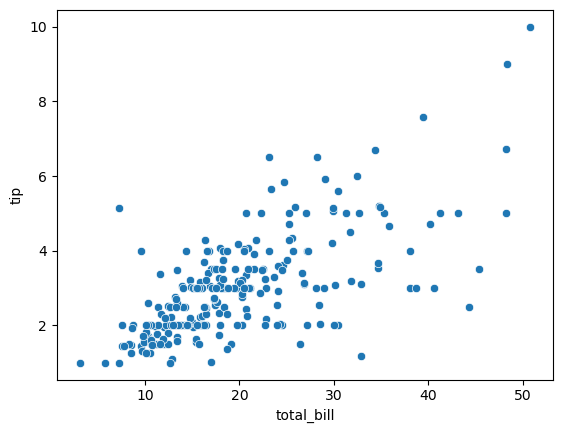

In [19]:
sns.scatterplot(x='total_bill', y='tip', data=tips)

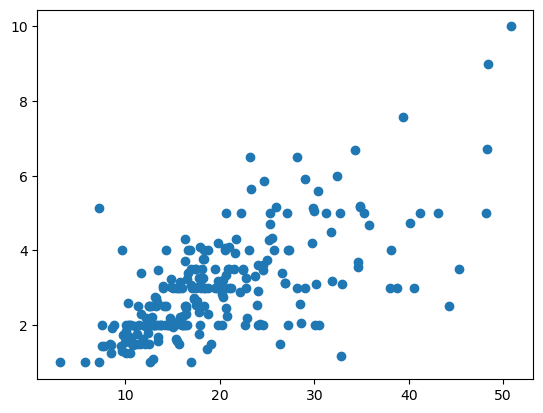

In [20]:
plt.scatter(x='total_bill', y='tip', data=tips)

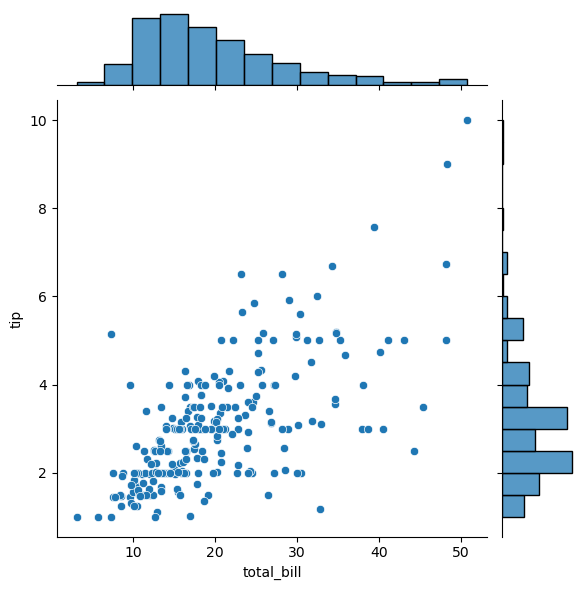

In [22]:
sns.jointplot(x='total_bill',y='tip',data=tips) #kind='scatter' - default

* So, this is essentially just two distribution plots along with a scatter plot having tip on y and total_bill on x axis 
* We can see that most of the tips are less than 4 dollars. The maximum in tip is around 10 dollars.
* We can see some trend in the tips with total_bill as well.
* Looks like, more the customer pay in bill, more he/she gave in the tip.

We will explore this in detail in a while. Let's play with kind parameter first!

**Kind = 'hex'**<br>
Let's pass hex to kind - hexagon distribution representation. This is similar to scatter. <br>
The hexagon more points in it, will be darker in color. <br>
Rather than displaying all points as a scatter plot, the plot is showing the distribution with hexagons and their color for distribution of data points with in the hexagon. 

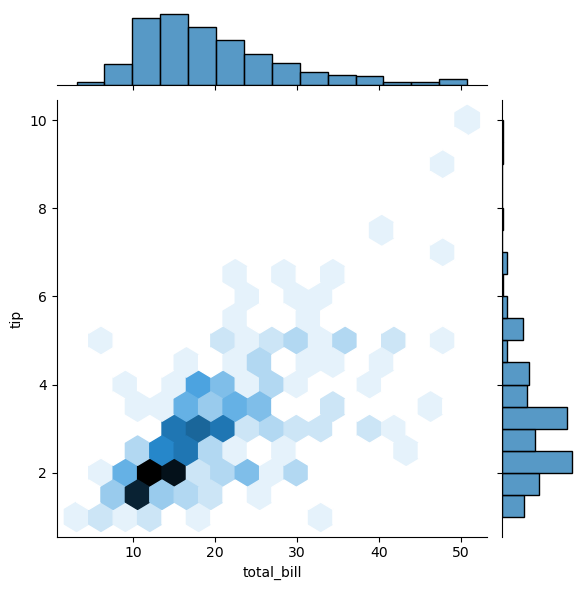

In [23]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

Let's try **Kind = 'reg'**<br>
**reg** is for regression. *<font style="font-size:12px;color:green;">We have not learned about linear regression yet, and we will discuss this in details in the machine learning section. We will come back and discuss how the line is built</font>* <br>
With kind = 'reg', the plot is like a scatter plot with a regression line drawn by seaborn. This is just showing almost like a linear fit ti the scattered data points. The plot has pearson coefficient and p-value which we will discuss later on while discussing linear regression. Let's not make things complicated in the data visualization section!  

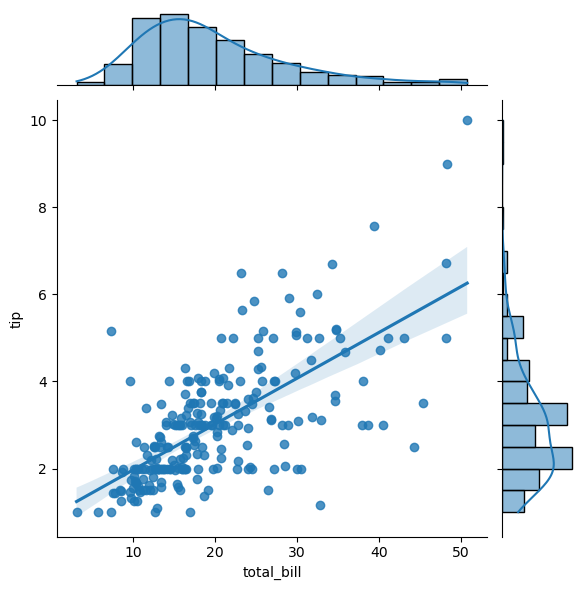

In [24]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

**Lets try kind = 'kde'**<br>
This will give 2D kde plot, showing the darker region with density where most of the data points match up.

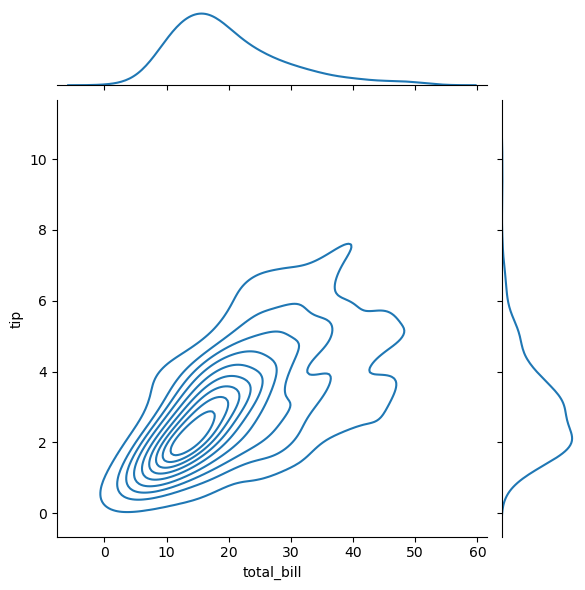

In [25]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='kde')

## <code>pairplot()

In [26]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [30]:
tips['sex'].value_counts().reset_index()

,index,sex
0,Male,157
1,Female,87


In [31]:
tips.groupby("sex")[["total_bill"]].count()

,total_bill
sex,
Male,157
Female,87


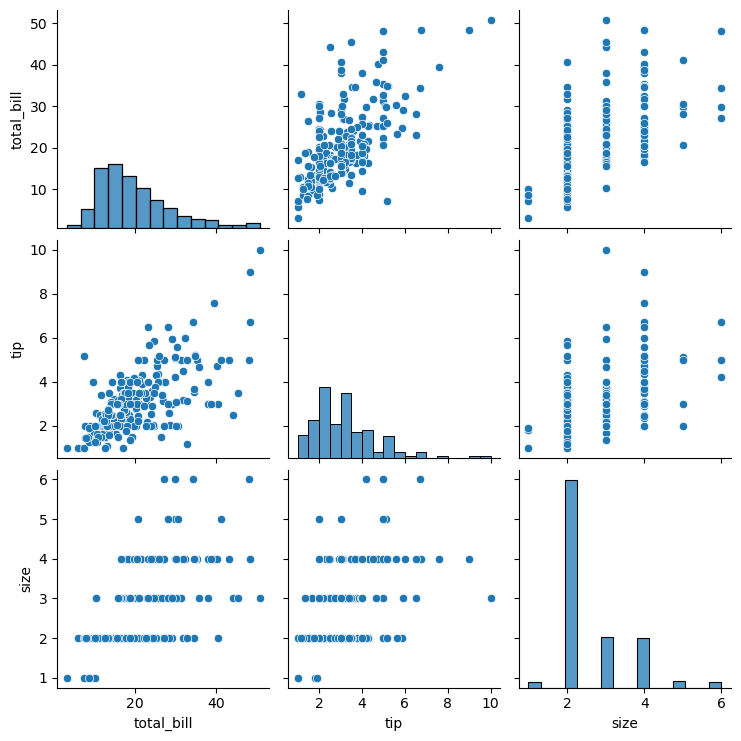

In [32]:
# We need to pass the entire data here
sns.pairplot(tips)

&#9989; Fo the larger dataframes, it takes longer time to plot the pairplot. Our data set 'tips' is relatively small, so we are fine with the time here.<br>
We see, the function plot scatter plots for two variable, e.g. total_bill vs size, tip vs size and when it come to size vs size in the bottom row, the plot is a histogram instead. Same thing for tip vs tip and total_bill vs total_bill along the diagonal. <br>
* Along with plotting pairwise relationships across an entire dataframe (for the numerical columns), <code>pairplot()</code> supports a color **hue argument (for categorical columns)** as well.<br>

For example, we can display information of the categorical column (male and female) **sex** of the customer using **hue** argument as shown below:

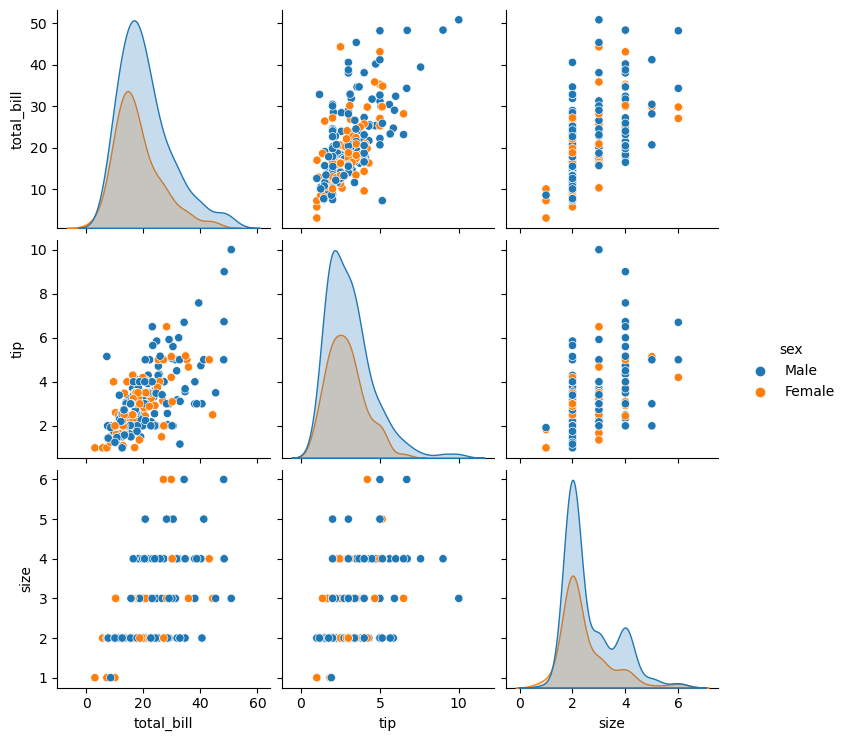

In [33]:
sns.pairplot(tips,hue='sex')

We can see that all the green points are Female and all the blue points are Male, based on the legend. We can specify the color palette e.g. "coolwarm" and many others that we will discuss in the style and color section later on.   

## <code>[kdeplot()](http://seaborn.pydata.org/generated/seaborn.kdeplot.html#seaborn.kdeplot)</code>

KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value. So with our tips dataset:

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

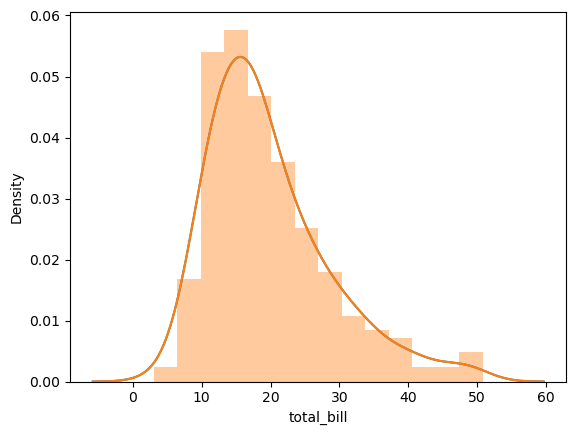

In [37]:
sns.kdeplot(tips['total_bill'])
sns.distplot(tips['total_bill'])

<AxesSubplot:xlabel='tip', ylabel='Density'>

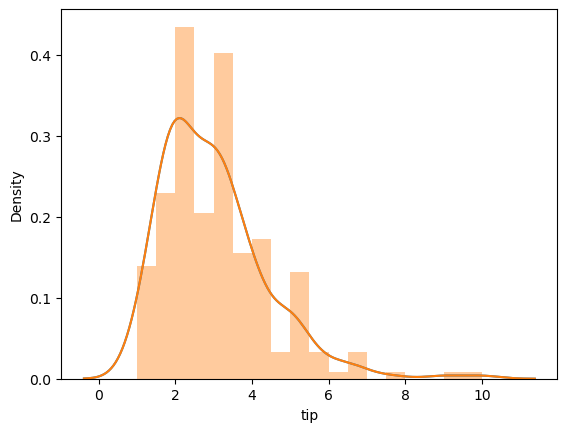

In [38]:
sns.kdeplot(tips['tip'])
sns.distplot(tips['tip'])